In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
happiness_df = pd.read_excel('DataForTable2.1WHR2023.xls')
happiness_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [9]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [10]:
happiness_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [11]:
happiness_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [12]:
happiness_df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [13]:
print("unique countries: ", happiness_df['Country name'].unique())
print("# of unique countries: ", happiness_df['Country name'].nunique())

unique countries:  ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Mada

In [32]:
happiness_df.year.value_counts()

2017    147
2011    146
2014    144
2019    143
2015    142
2012    141
2016    141
2018    141
2013    136
2010    124
2021    122
2020    116
2009    114
2022    114
2008    110
2007    102
2006     89
2005     27
Name: year, dtype: int64

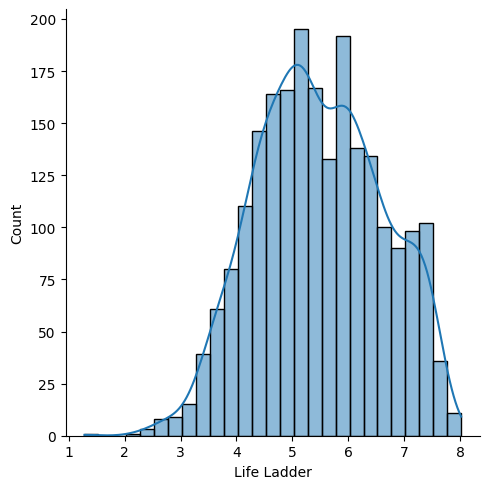

In [15]:
sns.displot(happiness_df['Life Ladder'], kde=True)

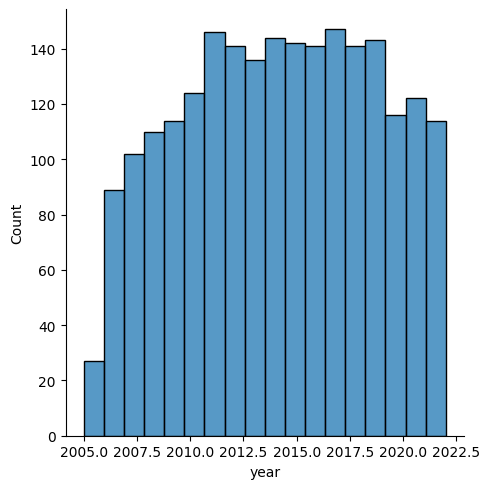

In [44]:
sns.displot(happiness_df['year'], bins=18)

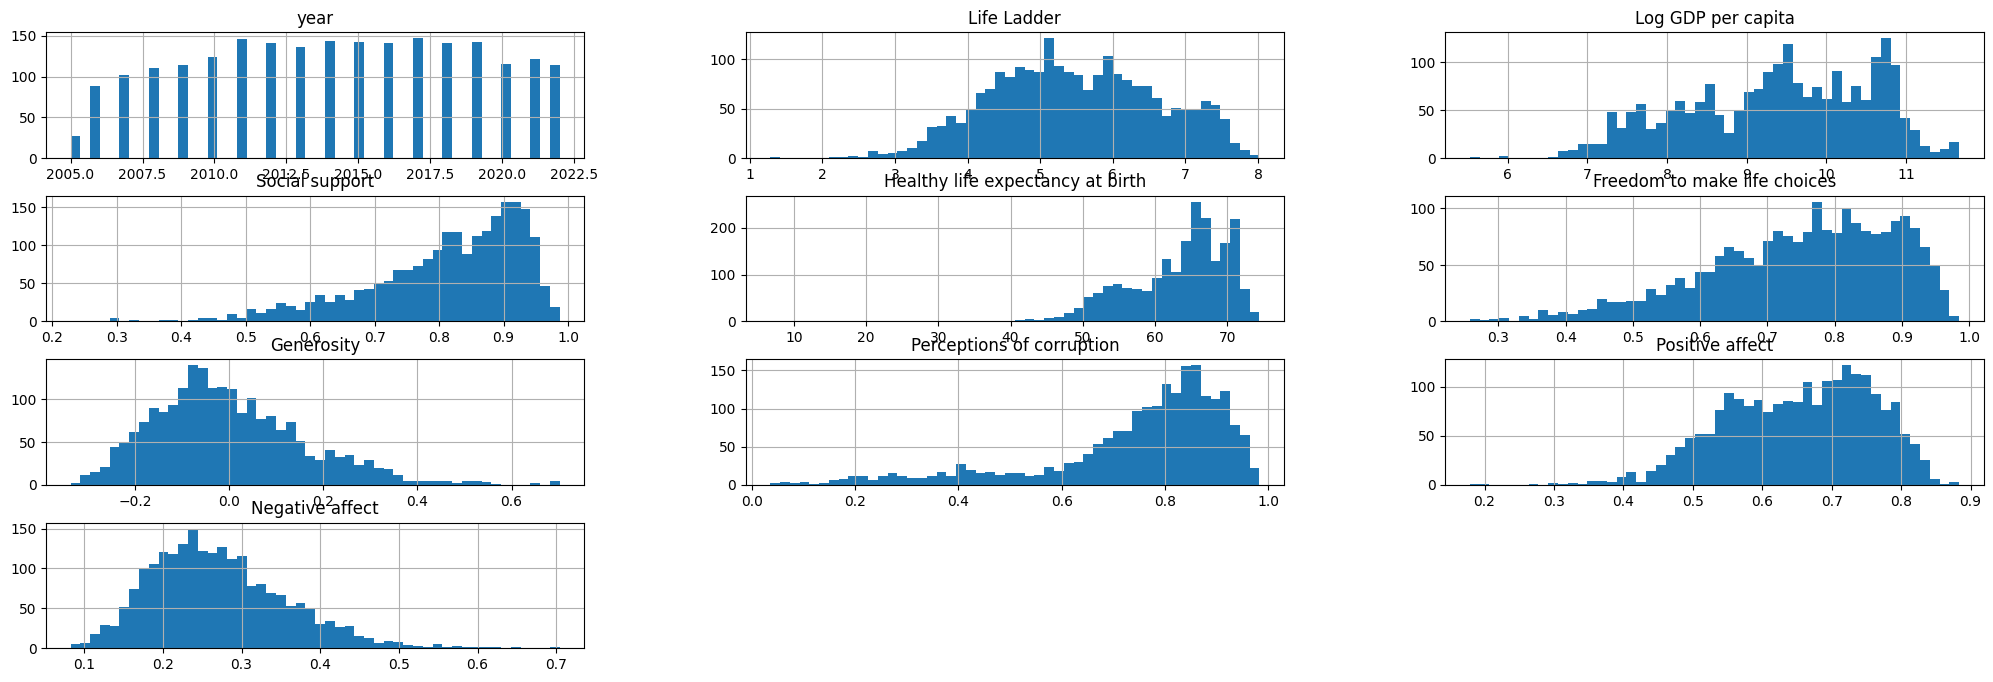

In [46]:
happiness_df.hist(bins=50, figsize=(25,8))
plt.show()

<AxesSubplot: xlabel='Life Ladder', ylabel='Log GDP per capita'>

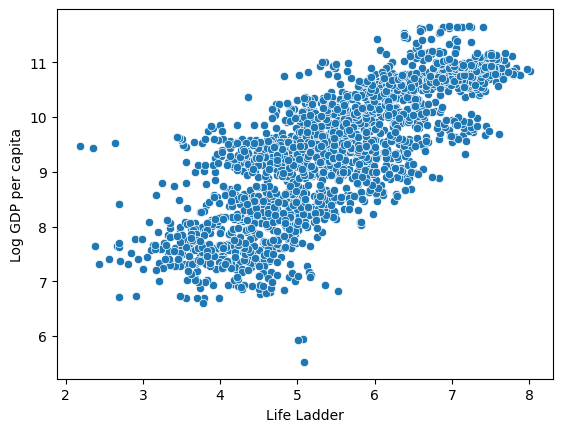

In [33]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Log GDP per capita'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Log GDP per capita'>

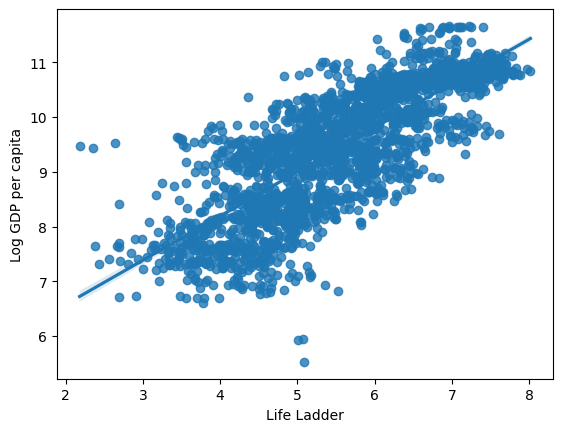

In [42]:
sns.regplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Log GDP per capita'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Social support'>

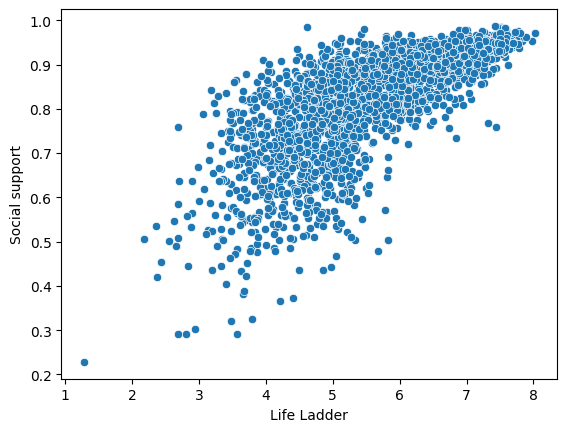

In [34]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Social support'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

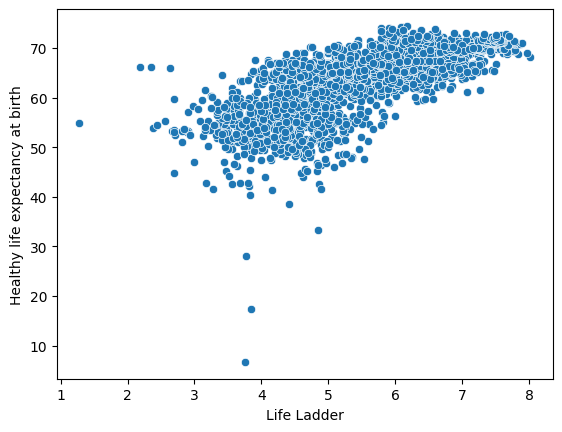

In [35]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Healthy life expectancy at birth'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Freedom to make life choices'>

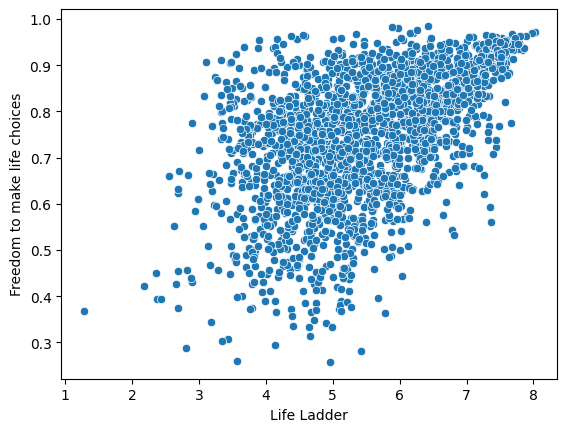

In [36]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Freedom to make life choices'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Perceptions of corruption'>

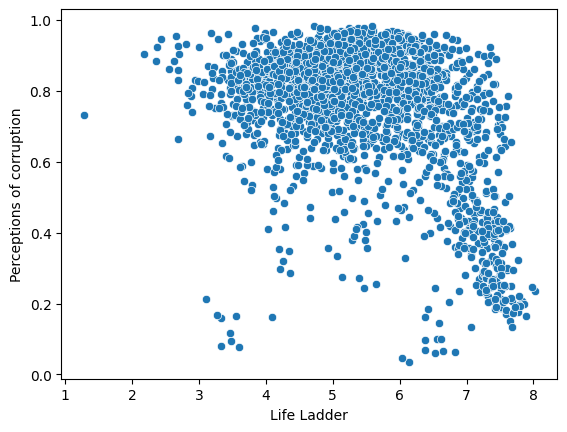

In [37]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Perceptions of corruption'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Positive affect'>

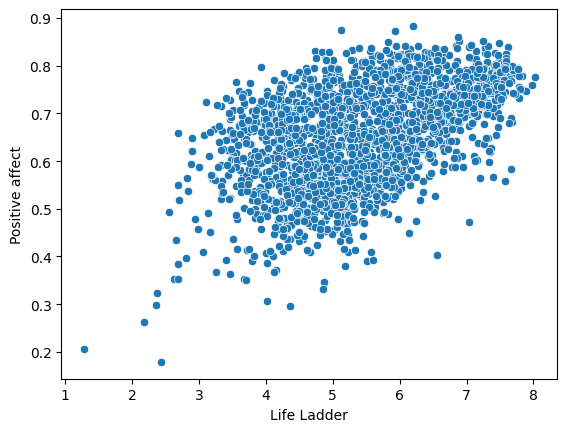

In [38]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Positive affect'])

<AxesSubplot: xlabel='Life Ladder', ylabel='Negative affect'>

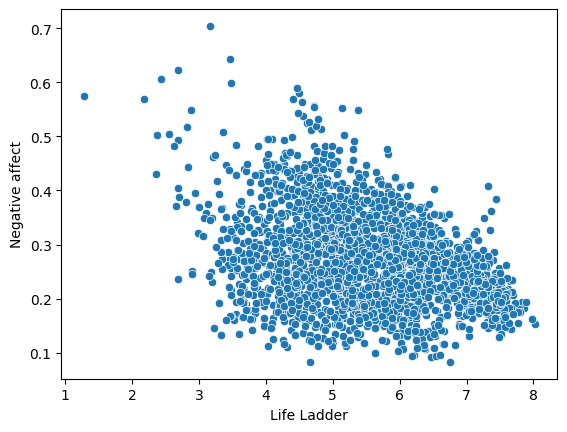

In [39]:
sns.scatterplot(data=happiness_df, x=happiness_df['Life Ladder'], y=happiness_df['Negative affect'])

<AxesSubplot: xlabel='Log GDP per capita', ylabel='Perceptions of corruption'>

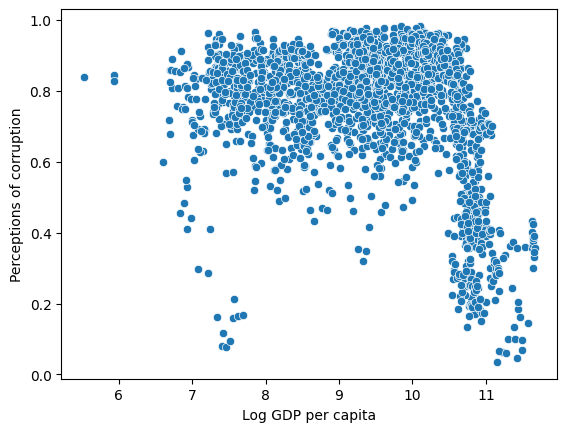

In [40]:
sns.scatterplot(data=happiness_df, x=happiness_df['Log GDP per capita'], y=happiness_df['Perceptions of corruption'])

<AxesSubplot: xlabel='Log GDP per capita', ylabel='Freedom to make life choices'>

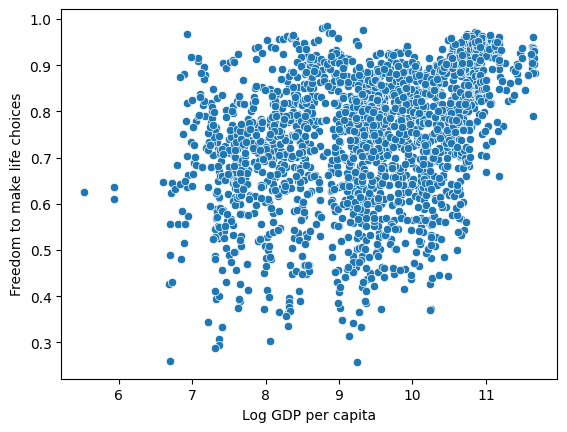

In [41]:
sns.scatterplot(data=happiness_df, x=happiness_df['Log GDP per capita'], y=happiness_df['Freedom to make life choices'])

In [48]:
happiness_df_2013 = happiness_df.query('year == 2013')
happiness_df_2013

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
19,Albania,2013,4.550648,9.338146,0.759477,68.440002,0.631830,-0.128825,0.862905,0.540751,0.338379
41,Angola,2013,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375,0.650047,0.370875
50,Argentina,2013,6.582260,10.103327,0.909874,66.660004,0.737250,-0.133839,0.822900,0.766157,0.254205
67,Armenia,2013,4.277191,9.275876,0.723260,65.519997,0.504082,-0.198420,0.899797,0.502904,0.449950
...,...,...,...,...,...,...,...,...,...,...,...
2128,Venezuela,2013,6.552796,9.801931,0.896301,65.180000,0.641965,-0.227712,0.837300,0.812144,0.237609
2145,Vietnam,2013,5.022699,8.889822,0.759477,64.739998,0.919607,-0.045563,0.771246,0.688878,0.165225
2160,Yemen,2013,4.217679,8.166425,0.693905,58.480000,0.542547,-0.175701,0.885197,0.478329,0.265685
2173,Zambia,2013,5.243996,8.110991,0.761312,51.380001,0.769912,-0.104995,0.732268,0.726740,0.307960


In [59]:
happiness_df_2013[['Country name','Life Ladder']].sort_values('Life Ladder')

,Country name,Life Ladder
1883,Syria,2.687553
279,Burkina Faso,3.325950
1641,Rwanda,3.466388
185,Benin,3.479413
356,Chad,3.507663
...,...,...
628,Finland,7.444636
97,Austria,7.498803
823,Iceland,7.501394
512,Denmark,7.588607


In [49]:
happiness_df_2013.loc[happiness_df_2013['Life Ladder'] == max(happiness_df_2013['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
334,Canada,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.311748,0.406236,0.800634,0.26285


In [50]:
happiness_df_2013.loc[happiness_df_2013['Life Ladder'] == min(happiness_df_2013['Life Ladder'])]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1883,Syria,2013,2.687553,8.418935,0.58545,59.82,0.454883,0.221555,0.663431,0.353619,0.62223


In [60]:
happiness_df_2023 = happiness_df.query('year == 2023')
happiness_df_2023

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


Question 1
What is your evaluation of the quality of the data? How large is the dataset? What are the
features (columns) and how are they represented? Are there any interesting distributions in the (numeric) features? Are there any interesting correlations in the data? Can you identify any limitations, missing values or distortions of the data? What would you like to see in this dataset?

Answer 1


Question 2
What is the happiest country in 2023? In 2013? Of all time? What is the least happy country in 2023, 2013 and of all time?

Answer 2


Question 3
Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023? Which had the largest decrease in happiness?

Answer 3
